<a href="https://colab.research.google.com/github/avani1998/Interrilato/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [122]:
factors_df = pd.read_csv("factors.csv")
for col in factors_df.columns:
  print(col)

State/UT
Literacy rate
poverty rate
Unemployment Rate (in %) - NSSO - 2011-12
crime rate
%contribution
BPL
Unemploy


In [123]:
factors_df.rename(columns={'Unemployment Rate (in %) - NSSO - 2011-12':'Unemployment rate','poverty rate':'Poverty rate','%contribution':'% Crime contribution'},
            inplace=True)

In [124]:
factors_df.drop(['crime rate','Unemploy'],axis=1, inplace=True)

In [125]:
factors_df.dropna(inplace=True)
factors_df.head()

,State/UT,Literacy rate,Poverty rate,Unemployment rate,% Crime contribution,BPL
0,Andhra Pradesh,67.02,9.20,2.0,8.2,5.8
1,Arunachal Pradesh,65.38,34.67,2.2,0.1,20.3
2,Assam,72.19,31.98,4.6,2.9,20.5
3,Bihar,61.80,33.70,3.4,5.8,31.2
4,Chhattisgarh,70.28,35.93,1.4,2.5,24.8


In [126]:
keep_columns=['Unemployment rate','% Crime contribution','Poverty rate','Literacy rate']
df=factors_df[keep_columns]
df.head()

,Unemployment rate,% Crime contribution,Poverty rate,Literacy rate
0,2.0,8.2,9.20,67.02
1,2.2,0.1,34.67,65.38
2,4.6,2.9,31.98,72.19
3,3.4,5.8,33.70,61.80
4,1.4,2.5,35.93,70.28


In [127]:
import cufflinks as cf 
fig=df.iplot(asFigure=True,kind='box')
fig.show()

In [128]:
import plotly.express as px
fig1 = px.scatter(factors_df,x="Unemployment rate",y="% Crime contribution",color='State/UT')
fig1.show()
#fig2 = px.scatter(dan,x="poverty rate",y="%contribution",color='State/UT')
#fig2.show()
#fig3 = px.scatter(dan,x="Literacy rate",y="%contribution",color='State/UT')
#fig3.show()

In [129]:
df.corr()

,Unemployment rate,% Crime contribution,Poverty rate,Literacy rate
Unemployment rate,1.000000,-0.293774,-0.219876,0.390664
% Crime contribution,-0.293774,1.000000,-0.019121,-0.357863
Poverty rate,-0.219876,-0.019121,1.000000,-0.528483
Literacy rate,0.390664,-0.357863,-0.528483,1.000000


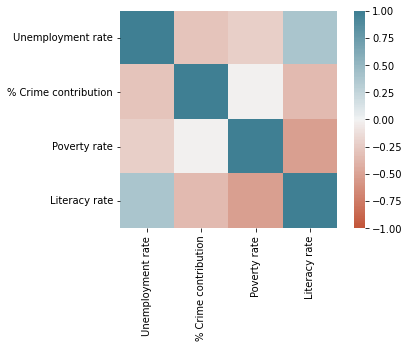

In [130]:
coMatrix=df.corr()
coMatrix.style.background_gradient(cmap='coolwarm')

ax = sns.heatmap(
    coMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

In [131]:
Y=factors_df['% Crime contribution']
X=factors_df[['Unemployment rate','Poverty rate','Literacy rate']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In [132]:
def calc_ISE(X_train, y_train, model):
    
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return model.score(X_train, y_train), rmse
    
def calc_OSE(X_test, y_test, model):
    
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return model.score(X_test, y_test), rmse

In [133]:
from sklearn.metrics import mean_squared_error

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
is_r2, ise = calc_ISE(X_train, Y_train, model)
os_r2, ose = calc_OSE(X_test, Y_test, model)
# show dataset sizes
data_list = (('R^2_in', is_r2), ('R^2_out', os_r2), 
             ('ISE', ise), ('OSE', ose))
for item in data_list:
    print('{:10}: {}'.format(item[0], item[1]))

R^2_in    : 0.2642488982254946
R^2_out   : -0.08472276527621658
ISE       : 2.723789078128938
OSE       : 3.4864155499445566


In [134]:
from scipy.stats import linregress
print(linregress(factors_df['% Crime contribution'], factors_df['Literacy rate']))
print(linregress(factors_df['% Crime contribution'], factors_df['Unemployment rate']))
print(linregress(factors_df['% Crime contribution'], factors_df['Poverty rate']))

LinregressResult(slope=-0.9364065695316406, intercept=80.60503126643859, rvalue=-0.3578631644451704, pvalue=0.03479594447032603, stderr=0.4253361340422846)
LinregressResult(slope=-0.3469648676662381, intercept=4.62736288055878, rvalue=-0.29377356512736125, pvalue=0.08673172711068965, stderr=0.19652460850961792)
LinregressResult(slope=-0.0651638336482284, intercept=17.975437652324672, rvalue=-0.01912116704312578, pvalue=0.9131835638177148, stderr=0.593138143051468)


In [135]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                   Coefficient
Unemployment rate    -0.082736
Poverty rate         -0.112838
Literacy rate        -0.215036


In [136]:
y_pred = model.predict(X_test)
print(y_pred)

[2.55661214 2.28906034 0.89828894 3.58666095 5.86065219 2.01931636
 5.94481627]


In [137]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [138]:
model=sm.OLS(Y_train,X_train)
result=model.fit()
predictions=result.predict(X_test)
#print(predictions,Y_test)
print(result.summary())

                                  OLS Regression Results                                 
Dep. Variable:     % Crime contribution   R-squared (uncentered):                   0.399
Model:                              OLS   Adj. R-squared (uncentered):              0.327
Method:                   Least Squares   F-statistic:                              5.542
Date:                  Wed, 29 Sep 2021   Prob (F-statistic):                     0.00467
Time:                          15:00:00   Log-Likelihood:                         -72.267
No. Observations:                    28   AIC:                                      150.5
Df Residuals:                        25   BIC:                                      154.5
Df Model:                             3                                                  
Covariance Type:              nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [139]:
literature_df=pd.merge(factors_df, pd.read_csv("literature_India.csv") , on='State/UT')
literature_df.dropna(inplace=True)
literature_df.head()

,State/UT,Literacy rate,Poverty rate,Unemployment rate,% Crime contribution,BPL,literacy rate,%male,%female,%urban,%rural
0,Andhra Pradesh,67.02,9.20,2.0,8.2,5.8,67.02,50.179423,49.820577,33.363462,66.636538
1,Arunachal Pradesh,65.38,34.67,2.2,0.1,20.3,65.38,51.593414,48.406586,22.652301,77.267048
2,Assam,72.19,31.98,4.6,2.9,20.5,72.19,51.078830,48.921170,14.064012,85.819682
3,Bihar,61.80,33.70,3.4,5.8,31.2,61.80,52.140675,47.859325,11.267695,88.449100
4,Chhattisgarh,70.28,35.93,1.4,2.5,24.8,70.28,50.236037,49.763963,23.239350,76.741069


In [140]:
import plotly.graph_objects as go

# Add data
state= literature_df["State/UT"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=state, y=literature_df["%male"], name='Male',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=state, y=literature_df["%female"], name = 'Female',
                         line=dict(color='royalblue', width=4)))

fig.add_trace(go.Scatter(x=state, y=literature_df["Literacy rate"], name='Literacy rate',
                         line = dict(color='green', width=4,)))

# Edit the layout
fig.update_layout(title='Literacy rate and gender',
                   xaxis_title='States',
                   yaxis_title='Rates')
fig.show()

In [141]:
sorted_df=factors_df.sort_values('% Crime contribution')
sorted_df.head()

,State/UT,Literacy rate,Poverty rate,Unemployment rate,% Crime contribution,BPL
32,Daman & Diu,87.10,9.86,0.1,0.0,12.6
31,Dadra & Nagar Haveli,76.24,39.31,0.0,0.0,15.4
30,Chandigarh,86.05,21.81,6.0,0.0,22.3
29,A & N Islands,86.63,1.00,6.5,0.0,0.0
23,Sikkim,81.42,8.19,1.2,0.0,3.7


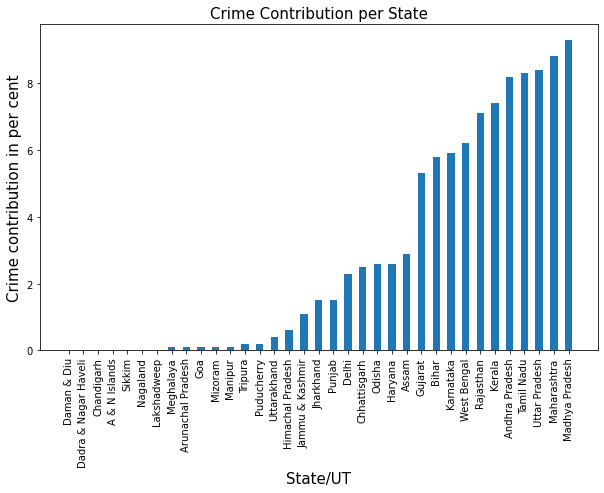

In [142]:
plt.figure(figsize=(10,6))
plt.bar('State/UT', '% Crime contribution',data=sorted_df, width=0.5)
plt.xlabel("State/UT", size=15)
plt.ylabel("Crime contribution in per cent", size=15)
plt.title("Crime Contribution per State", size=15)
plt.xticks(rotation='vertical')
plt.show()

In [143]:
sorted_df=factors_df.sort_values('Literacy rate')
sorted_df.head()

,State/UT,Literacy rate,Poverty rate,Unemployment rate,% Crime contribution,BPL
3,Bihar,61.80,33.70,3.4,5.8,31.2
1,Arunachal Pradesh,65.38,34.67,2.2,0.1,20.3
22,Rajasthan,66.11,14.71,1.2,7.1,10.7
11,Jharkhand,66.41,31.96,2.6,1.5,24.8
0,Andhra Pradesh,67.02,9.20,2.0,8.2,5.8


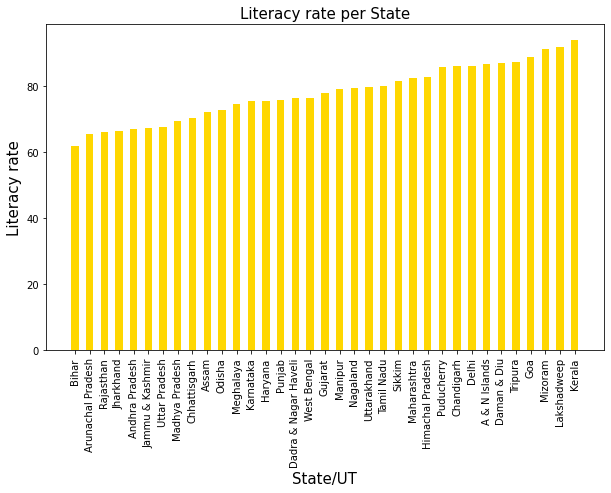

In [144]:
plt.figure(figsize=(10,6))
plt.bar('State/UT', 'Literacy rate',data=sorted_df, width=0.5, color='gold')
plt.xlabel("State/UT", size=15)
plt.ylabel("Literacy rate", size=15)
plt.title("Literacy rate per State", size=15)
plt.xticks(rotation='vertical')
plt.show()

In [145]:
sorted_df=factors_df.sort_values('Poverty rate')
sorted_df.head()

,State/UT,Literacy rate,Poverty rate,Unemployment rate,% Crime contribution,BPL
29,A & N Islands,86.63,1.00,6.5,0.0,0.0
13,Kerala,94.00,1.05,6.6,7.4,5.0
33,Lakshadweep,91.85,2.77,13.8,0.0,3.4
6,Goa,88.70,5.09,4.9,0.1,4.1
9,Himachal Pradesh,82.80,8.00,1.3,0.6,4.3


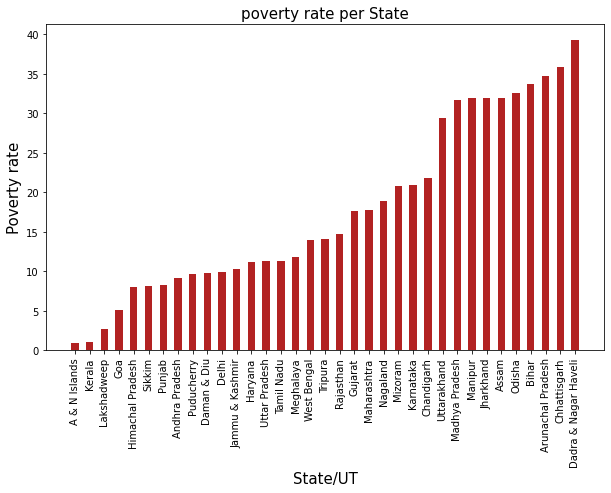

In [146]:
plt.figure(figsize=(10,6))
plt.bar('State/UT', 'Poverty rate',data=sorted_df, width=0.5, color='firebrick')
plt.xlabel("State/UT", size=15)
plt.ylabel("Poverty rate", size=15)
plt.title("poverty rate per State", size=15)
plt.xticks(rotation='vertical')
plt.show()

In [147]:
sorted_df=factors_df.sort_values('Unemployment rate')
sorted_df.head()

,State/UT,Literacy rate,Poverty rate,Unemployment rate,% Crime contribution,BPL
31,Dadra & Nagar Haveli,76.24,39.31,0.0,0.0,15.4
32,Daman & Diu,87.10,9.86,0.1,0.0,12.6
7,Gujarat,78.03,17.63,0.5,5.3,10.1
17,Meghalaya,74.43,11.87,0.8,0.1,9.3
14,Madhya Pradesh,69.32,31.65,0.9,9.3,21.0


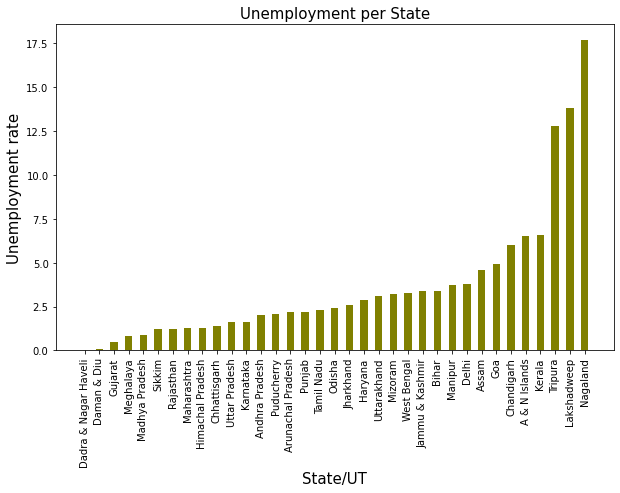

In [148]:
plt.figure(figsize=(10,6))
plt.bar('State/UT', 'Unemployment rate',data=sorted_df, width=0.5, color='olive')
plt.xlabel("State/UT", size=15)
plt.ylabel("Unemployment rate", size=15)
plt.title("Unemployment per State", size=15)
plt.xticks(rotation='vertical')
plt.show()